# Data Science Practice

This is a data set of kickstarter projects.

There are three main questions to consider:
- Looking into the dataset, what useful information can you extract from it? **(Exploratory data analysis)**
- Can you predict whether a project will get funded successfully or not? **(Prediction)**
- Which variables are informative for your prediction? In particular, how will you interpret your model? **(Model explanation)**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load data

In [2]:
# Load data with 'latin1' encoding
df = pd.read_csv('kick_starter.csv', encoding = "latin1", index_col=0)

In [3]:
df.head()

,id,photo,name,blurb,goal,state,slug,disable_communication,country,currency,...,creator,location,category,profile,urls,source_url,friends,is_starred,is_backing,permissions
0,663816109,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Angular - Where Modern Art meets Cards,Angular is a minimalist card design for simpli...,17380.0,failed,angular-where-modern-art-meets-cards,False,US,USD,...,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN
1,1462931821,"{""small"":""https://ksr-ugc.imgix.net/assets/014...",Ladybeard is KAWAII-CORE,Original songs and music videos to jump start ...,24000.0,failed,ladybeard-is-kawaii-core,False,US,USD,...,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""JP"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN
2,1724358498,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Vegan Cafe Delivery Service in Vancouver BC,Our project is to launch a vegan lunch deliver...,40000.0,failed,vegancafeca,False,CA,CAD,...,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""CA"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN
3,314918941,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Photoetched Rail Yard Exposition,I have developed a process of my own which tra...,1000.0,successful,photoetched-rail-yard-exposition,False,US,USD,...,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN
4,1766165140,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Cinnamon Fletcher needs to be brought to life!,Need to pay an illustrator to bring my childre...,700.0,failed,cinnamon-fletcher-needs-to-be-brought-to-life,False,GB,GBP,...,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""GB"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN


# Describe and clean data

The labelled dataset contains 10,000 projects with 28 columns - 27 features and "state" (binary outcome). I manually analyzed below which features are likely not very relevant for our task or redundant. Features with missing values may also have to be cleaned.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 28 columns):
id                        10000 non-null int64
photo                     10000 non-null object
name                      9999 non-null object
blurb                     9998 non-null object
goal                      10000 non-null float64
state                     10000 non-null object
slug                      10000 non-null object
disable_communication     10000 non-null bool
country                   9707 non-null object
currency                  9707 non-null object
currency_trailing_code    10000 non-null bool
deadline                  10000 non-null int64
state_changed_at          10000 non-null int64
created_at                10000 non-null int64
launched_at               10000 non-null int64
staff_pick                10000 non-null bool
backers_count             10000 non-null int64
static_usd_rate           10000 non-null float64
creator                   10000 non-null o

## Remove features

The features which I remove are as follows (with reasons in brackets):
- id (irrelevant)
- photo (deemed irrelevant, though may be area for future work)
- currency ('country' generally determines currency, so redundant)
- currency_trailing_code (I believe this shows how the currency numbers are displayed)
- creator (I don't have any more information about creators. One could potentially scrape the website and see how many successful projects they had and use this information.)
- state_changed_at (This information will not be available at the time of project launch)
- slug (correlates with name)
- location (correlates with 'country', so redundant. The city location may help, but the data for each city is likely too sparse.)
- backers_count (This information will not be available at the time of project launch)
- urls (irrelevant)
- source_url (irrelevant)
- profile (irrelevant)
- friends (mostly empty data)
- is_starred (mostly empty data)
- is_backing (mostly empty data)
- permissions (mostly empty data)

Just to check the four columns 'friends', 'is_starred', 'is_backing', and 'permissions' with mostly empty data are not some special cases which are all successful or all failed, I looked at the projects which have non-NaN values. I found that these projects are mostly live, with one successful. However, it does not look like these features will give us anything.

In [5]:
column = 'is_backing'
column = 'permissions'
column = 'is_starred'
column = 'friends'
df[[column, 'state']].loc[~df[column].isnull()]

,friends,state
601,[],live
605,[],live
1223,[],live
1744,[],live
2586,[],live
3006,[],live
3566,[],live
6900,[],successful
7060,[],live
7207,[],live


In [6]:
columns_to_drop = ['id', 'photo', 'currency', 'currency_trailing_code', 'creator', 'state_changed_at', 'slug',
                   'location', 'backers_count', 'urls', 'source_url', 'profile', 'friends', 'is_starred', 'is_backing',
                   'permissions']
df.drop(columns_to_drop, axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
name                     9999 non-null object
blurb                    9998 non-null object
goal                     10000 non-null float64
state                    10000 non-null object
disable_communication    10000 non-null bool
country                  9707 non-null object
deadline                 10000 non-null int64
created_at               10000 non-null int64
launched_at              10000 non-null int64
staff_pick               10000 non-null bool
static_usd_rate          10000 non-null float64
category                 10000 non-null object
dtypes: bool(2), float64(2), int64(3), object(5)
memory usage: 878.9+ KB


## Feature engineering

(1) I converted some categorical features to numerical ones:
    - name -> name_length (number of characters in name)
    - blurb -> blurb_length (number of characters in blurb)
    - deadline -> fundraising_period (time between launched_at and deadline)
    - created_at -> prelaunch_period (time between created_at and launched_at)

Empty fields in 'name' and 'blurb' are replaced with 0 rather than column median/average. Empty fields most likely mean minimal effort projects (ie. this feature has importance).

One could consider using NLP to analyze the words used and see whether 'better' (more positive?) words helps with prediction, but this is beyond the scope of this project.

In [8]:
# Fill in missing values in 'name' and 'blurb' with empty strings
df.name.fillna('', inplace=True)
df.blurb.fillna('', inplace=True)

# Create 'name_length', 'blurb_length', and 'fundraising_period' features
df['name_length'] = df.name.apply(len)
df['blurb_length'] = df.blurb.apply(len)
df['fundraising_period'] = (df.deadline - df.launched_at) / 3600 / 24  # convert to days for simplicuty
df['prelaunch_period'] = (df.launched_at - df.created_at) / 3600 / 24  # convert to days for simplicuty

# Drop the old columns
df = df.drop(['name', 'blurb', 'deadline'], axis=1)


(2) I converted the goal into usd using 'static_usd_rate' and remove 'static_usd_rate'.

In [9]:
df['goal_usd'] = df.goal * df.static_usd_rate

df = df.drop(['goal', 'static_usd_rate'], axis=1)

(3) I extracted the relevant information from 'category' feature. The relevant category appears to be after 'categories', so I extracted this.

In [10]:
df.category.head()

0    {"urls":{"web":{"discover":"http://www.kicksta...
1    {"urls":{"web":{"discover":"http://www.kicksta...
2    {"urls":{"web":{"discover":"http://www.kicksta...
3    {"urls":{"web":{"discover":"http://www.kicksta...
4    {"urls":{"web":{"discover":"http://www.kicksta...
Name: category, dtype: object

In [11]:
def extract_category(string):
    # Find split the string by '/'
    split_string = string.split('/')
    
    # Find the position of 'categories'. The string we seek is after that.
    idx = split_string.index('categories')
    return split_string[idx + 1]

In [12]:
df['category'] = df.category.apply(extract_category)

In [13]:
df.category.head()

0         games
1         music
2          food
3           art
4    publishing
Name: category, dtype: object

(4) The last features I created is the weekday, month, and year of launch.
Also I want to see whether there are any temporal trends, in particular whether the weekday or month of launch has any influence on success. Intial hypothesis is yes.
You could potentially do the same for date of creation, but let's skip this for now.
Similarly, you could do this for time of creation (using local time), but it's unlikely this will help.

I removed 'launched_at' feature after that.

In [14]:
df['launch_date'] = pd.to_datetime(df['launched_at'],unit='s')

df['launch_weekday'] = df.launch_date.apply(lambda x: x.weekday()) # Built-in function: Monday = 0, Sunday = 6
df['launch_month'] = df.launch_date.apply(lambda x: x.month)
df['launch_year'] = df.launch_date.apply(lambda x: x.year)

In [15]:
df.launch_weekday.head()

0    6
1    0
2    0
3    4
4    1
Name: launch_weekday, dtype: int64

In [16]:
df = df.drop(['launched_at', 'launch_date'], axis=1)
df.state.unique()

array(['failed', 'successful', 'canceled', 'live', 'suspended'], dtype=object)

Finally, we change outcome column to 1 (successful) and 0 (failed, cancelled or suspended). Projects which are still live are also removed as they are not correctly labelled yet.

In [17]:
df = df.loc[df.state != 'live']

In [18]:
df['successful'] = df.state.apply(lambda x: 1 if x == 'successful' else 0)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9821 entries, 0 to 9999
Data columns (total 15 columns):
state                    9821 non-null object
disable_communication    9821 non-null bool
country                  9533 non-null object
created_at               9821 non-null int64
staff_pick               9821 non-null bool
category                 9821 non-null object
name_length              9821 non-null int64
blurb_length             9821 non-null int64
fundraising_period       9821 non-null float64
prelaunch_period         9821 non-null float64
goal_usd                 9821 non-null float64
launch_weekday           9821 non-null int64
launch_month             9821 non-null int64
launch_year              9821 non-null int64
successful               9821 non-null int64
dtypes: bool(2), float64(3), int64(7), object(3)
memory usage: 1.1+ MB


## Data Cleaning Summary

To summarize, data cleaned has 12 features:

Categorical features (7):
- category
- country
- staff_pick
- disable_communication
- launch_weekday
- launch_month
- launch_year

Numerical features (5):
- name_length
- blurb_length
- goal_usd
- fundraising_period
- prelaunch_period

Prediction:
- successful/fail

# Exploratory data analysis

I now investigate each feature more closely to see whether they are really relevant.

In [20]:
df.describe()

,created_at,name_length,blurb_length,fundraising_period,prelaunch_period,goal_usd,launch_weekday,launch_month,launch_year,successful
count,9.821000e+03,9821.000000,9821.000000,9821.000000,9821.000000,9.821000e+03,9821.000000,9821.000000,9821.000000,9821.000000
mean,1.400410e+09,34.226454,114.272885,33.946243,39.935111,2.670844e+04,2.421546,6.279707,2014.007739,0.463191
std,5.505099e+07,15.788458,25.838549,12.686718,102.423317,2.710011e+05,1.785287,3.319243,1.779248,0.498669
min,1.240335e+09,0.000000,0.000000,1.550509,0.003426,7.615334e-01,0.000000,1.000000,2009.000000,0.000000
25%,1.359293e+09,21.000000,105.000000,30.000000,2.592870,1.800000e+03,1.000000,3.000000,2013.000000,0.000000
50%,1.408728e+09,33.000000,125.000000,30.000000,9.747593,5.000000e+03,2.000000,6.000000,2014.000000,0.000000
75%,1.441211e+09,48.000000,132.000000,35.557488,32.061065,1.250000e+04,4.000000,9.000000,2015.000000,1.000000
max,1.498894e+09,85.000000,158.000000,91.958333,1696.396632,1.500000e+07,6.000000,12.000000,2017.000000,1.000000


The mean success rate is 0.46.

## Analyzing the categorical features

In [21]:
df.describe(include=['O'])

,state,country,category
count,9821,9533,9821
unique,4,20,14
top,failed,US,music
freq,4631,7683,1988


Many countries, but most of them in the US. 14 different project categories.

In [22]:
df.describe(include=['bool'])

,disable_communication,staff_pick
count,9821,9821
unique,2,2
top,False,False
freq,9781,8699


Most projects allowed communication. Only 40 did not. Staff picked around 10% of the projects, although it is unclear whether as a project proposer we have any influence on whether staff can pick your project.

In [23]:
column = 'disable_communication'
df[[column, 'successful']].groupby([column], as_index=False).mean().sort_values(by='successful', ascending=False)

,disable_communication,successful
0,False,0.465085
1,True,0.000000


Projects in which the communication was disabled were never successful.

In [24]:
column = 'staff_pick'
df[[column, 'successful']].groupby([column], as_index=False).mean().sort_values(by='successful', ascending=False)

,staff_pick,successful
1,True,0.850267
0,False,0.413266


Projects that were picked by staff were a lot more successful, as expected.

In [25]:
column = 'country'
df_slice = df[[column, 'successful']].groupby([column]).mean().sort_values(by='successful', ascending=False)
df_slice['count'] = df[column].value_counts()
df_slice

,successful,count
country,,
US,0.481192,7683
DK,0.461538,13
SE,0.461538,39
IE,0.444444,18
GB,0.432051,780
CH,0.428571,14
FR,0.410714,56
NZ,0.409091,44
CA,0.398907,366


On average American, Swedish, and British projects are most successfuly, but their values are very close around the mean. Projects from certain other countries have been largely unsucessful (Spanish, Austria, Italian, Singapore, Hong Kong). The country of the proposed location therefore is relevant as well.

In [26]:
column = 'category'
df_slice = df[[column, 'successful']].groupby([column]).mean().sort_values(by='successful', ascending=False)
df_slice['count'] = df[column].value_counts()
df_slice

,successful,count
category,,
design,0.700413,484
dance,0.621951,82
comics,0.587302,315
games,0.547591,851
music,0.531187,1988
film%20&%20video,0.522175,1894
publishing,0.454984,1244
art,0.447974,913
photography,0.315353,241


We can also see that the success rate depends on the type/category of project.

In [27]:
column = 'launch_weekday'
df_slice = df[[column, 'successful']].groupby([column]).mean().sort_values(by='successful', ascending=False)
df_slice['count'] = df[column].value_counts()
df_slice

,successful,count
launch_weekday,,
1,0.482292,1920
3,0.479194,1538
2,0.465527,1755
4,0.457627,1534
5,0.448148,810
0,0.446770,1672
6,0.434122,592


There are a few variations in weekday, but perhaps not significant enough?
Tuesday - Thursday have slightly higher success rate

In [28]:
column = 'launch_month'
df_slice = df[[column, 'successful']].groupby([column]).mean().sort_values(by='successful', ascending=False)
df_slice['count'] = df[column].value_counts()
df_slice

,successful,count
launch_month,,
4,0.519494,949
3,0.496192,919
10,0.494505,728
9,0.486683,826
6,0.480050,802
5,0.459521,877
2,0.456311,824
11,0.454892,787
1,0.445466,761


Some months are more successful than others. In particular, the summer months (June, July, August) are particularly unsuccessful. Let's band the months together by season?

In [29]:
def month_to_season(month):
    if month in [12, 1, 2]:
        return 0  # winter
    elif month in [3, 4, 5]:
        return 1  # spring
    elif month in [6, 7, 8]:
        return 2  # summer
    elif month in [9, 10, 11]:
        return 3  # autumn

df['launch_season'] = df.launch_month.map(month_to_season)

In [30]:
column = 'launch_season'
df_slice = df[[column, 'successful']].groupby([column]).mean().sort_values(by='successful', ascending=False)
df_slice['count'] = df[column].value_counts()
df_slice

,successful,count
launch_season,,
1,0.492532,2745
3,0.478428,2341
0,0.445471,2164
2,0.432905,2571


In [31]:
column = 'launch_year'
df_slice = df[[column, 'successful']].groupby([column]).mean().sort_values(by='successful', ascending=False)
df_slice['count'] = df[column].value_counts()
df_slice

,successful,count
launch_year,,
2009,0.590909,44
2011,0.589102,679
2012,0.577778,1215
2010,0.575092,273
2013,0.568951,1211
2017,0.436036,555
2014,0.431772,1964
2016,0.394477,1521
2015,0.375159,2359


Earlier projects have been more successful, but this may be due to less projects being proposed at that time.

**Decisions**

Consider country, category, disable_communication, and staff_pick for model training.

Also consider launch_weekday and launch_season. (Perhaps not in first round of training)

## Analyzing the numerical features

In [32]:
df.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99])

,created_at,name_length,blurb_length,fundraising_period,prelaunch_period,goal_usd,launch_weekday,launch_month,launch_year,successful,launch_season
count,9.821000e+03,9821.000000,9821.000000,9821.000000,9821.000000,9.821000e+03,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000
mean,1.400410e+09,34.226454,114.272885,33.946243,39.935111,2.670844e+04,2.421546,6.279707,2014.007739,0.463191,1.518175
std,5.505099e+07,15.788458,25.838549,12.686718,102.423317,2.710011e+05,1.785287,3.319243,1.779248,0.498669,1.080375
min,1.240335e+09,0.000000,0.000000,1.550509,0.003426,7.615334e-01,0.000000,1.000000,2009.000000,0.000000,0.000000
10%,1.321952e+09,14.000000,75.000000,21.000579,0.409271,6.000000e+02,0.000000,2.000000,2011.000000,0.000000,0.000000
20%,1.345275e+09,19.000000,97.000000,29.958333,1.806875,1.277807e+03,1.000000,3.000000,2012.000000,0.000000,0.000000
30%,1.371356e+09,23.000000,110.000000,30.000000,3.552523,2.227447e+03,1.000000,4.000000,2013.000000,0.000000,1.000000
40%,1.395445e+09,28.000000,119.000000,30.000000,5.961435,3.500000e+03,2.000000,5.000000,2014.000000,0.000000,1.000000
50%,1.408728e+09,33.000000,125.000000,30.000000,9.747593,5.000000e+03,2.000000,6.000000,2014.000000,0.000000,2.000000
60%,1.422768e+09,38.000000,129.000000,30.000000,15.296991,7.000000e+03,3.000000,7.000000,2015.000000,1.000000,2.000000


There are some outliers in prelaunch_period (with 500 days) and goal_usd (with 15 million goal).

,successful,name_length
0,0,33.144347
1,1,35.480545


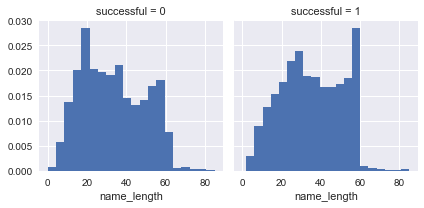

In [33]:
column = 'name_length'
g = sns.FacetGrid(df, col='successful')
g.map(plt.hist, column, bins=20, normed=True)
df[[column, 'successful']].groupby(['successful'], as_index=False).mean()

There are more successful projects with slightly longer names.

,successful,blurb_length
0,0,113.324924
1,1,115.371510


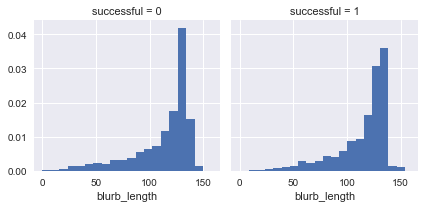

In [34]:
column = 'blurb_length'
g = sns.FacetGrid(df, col='successful')
g.map(plt.hist, column, bins=20, normed=True)
df[[column, 'successful']].groupby(['successful'], as_index=False).mean()

,successful,fundraising_period
0,0,35.362885
1,1,32.304446


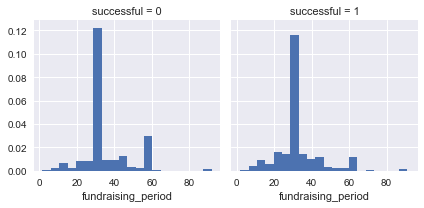

In [35]:
column = 'fundraising_period'
g = sns.FacetGrid(df, col='successful')
g.map(plt.hist, column, bins=20, normed=True)
df[[column, 'successful']].groupby(['successful'], as_index=False).mean()

blurb_length and fundraising period do not seem to matter as much. There is spike for 60 days for unsuccessful projects. But this may be because these projects were extended? (I am not sure whether that is possible on Kickstarter)

,successful,prelaunch_period
0,0,34.815287
1,1,45.868659


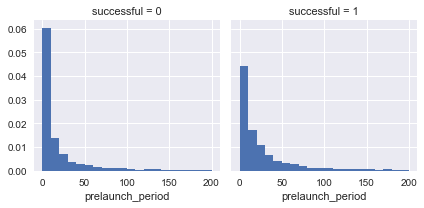

In [36]:
column = 'prelaunch_period'
g = sns.FacetGrid(df, col='successful')
g.map(plt.hist, column, bins=20, normed=True, range=(0, 200))
df[[column, 'successful']].groupby(['successful'], as_index=False).mean()

It seems successful projects have slightly longer pre-launch period. But this may be because those with longer pre-launch period are better organised?

In [37]:
df['goal_usd'].describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99])

count    9.821000e+03
mean     2.670844e+04
std      2.710011e+05
min      7.615334e-01
10%      6.000000e+02
20%      1.277807e+03
30%      2.227447e+03
40%      3.500000e+03
50%      5.000000e+03
60%      7.000000e+03
70%      1.000000e+04
80%      1.650000e+04
90%      3.175648e+04
99%      3.500000e+05
max      1.500000e+07
Name: goal_usd, dtype: float64

There is a outlier with 15 million goal...

,successful,goal_usd
0,0,6000.0000
1,1,3680.1891


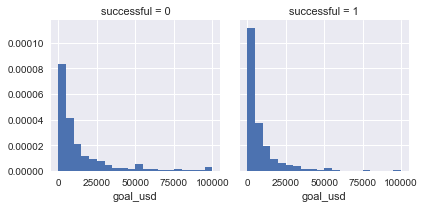

In [38]:
column = 'goal_usd'
g = sns.FacetGrid(df, col='successful')
g.map(plt.hist, column, bins=20, normed=True, range=(0, 1e5))
df[[column, 'successful']].groupby(['successful'], as_index=False).median()

Here we look at the median. We find the cheaper goals are more likely to be successful.

Let's divide goal_usd into 5 bands based on quartiles.

In [39]:
df['goal_usd_band'] = pd.qcut(df['goal_usd'], 5)

In [40]:
column = 'goal_usd_band'
df_slice = df[[column, 'successful']].groupby([column]).mean().sort_values(by='successful', ascending=False)
df_slice['count'] = df[column].value_counts()
df_slice

,successful,count
goal_usd_band,,
"(0.761, 1277.807]",0.568448,1965
"(1277.807, 3500.0]",0.538353,2125
"(3500.0, 7000.0]",0.460613,1828
"(7000.0, 16500.0]",0.443872,1942
"(16500.0, 15000000.0]",0.297807,1961


Convert goal_usd_band to ordinal values

In [41]:
df.loc[df.goal_usd <= 1277.807, 'goal_usd_band2'] = 0
df.loc[(1277.807 < df.goal_usd) & (df.goal_usd <= 3500 ), 'goal_usd_band2'] = 1
df.loc[(3500 < df.goal_usd) & (df.goal_usd <= 7000), 'goal_usd_band2'] = 2
df.loc[(7000 < df.goal_usd) & (df.goal_usd <= 16500), 'goal_usd_band2'] = 3
df.loc[(16500 < df.goal_usd), 'goal_usd_band2'] = 4

In [42]:
# Rename
df = df.drop('goal_usd_band', axis=1)
df = df.rename(columns={'goal_usd_band2': 'goal_usd_band'})

**Decisions**

Consider prelaunch period and goal_usd for model training.

## Summary

In my initial data analysis, I found that the following features show to correlate strongly with whether success rate:
- category (certain categories like design are more likely to be funded)
- country (certain countries have historically lower success rate)
- goal_usd_band (lower is better)
- disable_communication (disable_communication == True is bad)
- staff_pick (staff_pick == True is good)

Other features have weaker correlations (which may be noise):
- launch_season (summer season seem less successful)
- launch_weekday (Tue - Thu have slightly higher success rate)

Another observation:
- Over the years the success rate has gone down (from 59% to around 40%)

In [43]:
final_df = df.loc[:, ['category', 'country', 'goal_usd_band', 'disable_communication', 'staff_pick',
                      'launch_season', 'launch_weekday',
                      'successful']]

As a final step, I converted categorical variables to ordinal variables for training.

In [44]:
column = 'country'
country_to_number = {country: idx  for idx, country in enumerate(final_df[column].unique())}
final_df[column] = final_df[column].map(country_to_number).astype(int)

In [45]:
column = 'category'
category_to_number = {category: idx  for idx, category in enumerate(final_df[column].unique())}
final_df[column] = final_df[column].map(category_to_number).astype(int)

In [46]:
final_df.head()

,category,country,goal_usd_band,disable_communication,staff_pick,launch_season,launch_weekday,successful
0,0,0,4.0,False,False,0,6,0
1,1,0,4.0,False,False,0,0,0
2,2,1,4.0,False,False,2,0,0
3,3,0,0.0,False,False,0,4,1
4,4,2,0.0,False,False,3,1,0


# Model training and prediction

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

I used a variety of supervised learning algorithm from scikitlearn for this problem with 10-fold cross-validation.

In [48]:
data = final_df.drop('successful', axis=1)
target = final_df['successful']

In [49]:
from sklearn.model_selection import cross_val_score
clf = LogisticRegression()
scores = cross_val_score(clf, data, target, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.65 (+/- 0.04)


To analyze the importance of each feature, I performed logistic regression on a single train/test data split and look at the correlation.

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.62156663275686674

In [51]:
coeff_df = pd.DataFrame(data.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
4,launch_season,2.421113
5,launch_weekday,0.020035
0,country,-0.015901
1,goal_usd_band,-0.064499
2,disable_communication,-0.355609
3,staff_pick,-2.358665


It appears that launch_season has the highest correlation.

In [52]:
# Support vector machine
clf = SVC()
scores = cross_val_score(clf, data, target, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.66 (+/- 0.03)


In [53]:
# k-nearest-neighbour
clf = KNeighborsClassifier(n_neighbors = 10)
scores = cross_val_score(clf, data, target, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.63 (+/- 0.04)


In [54]:
# Gaussian Naive Bayesian
clf = GaussianNB()
scores = cross_val_score(clf, data, target, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.48 (+/- 0.01)


In [55]:
# Decision Tree Classifier
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, data, target, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.62 (+/- 0.03)


In [56]:
# Random Forest
clf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(clf, data, target, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.64 (+/- 0.03)


In [57]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

# Hyperparameter tuning
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

In [58]:
clf = grid_obj.best_estimator_
scores = cross_val_score(clf, data, target, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.67 (+/- 0.04)


SVC and RF seem to do the best.

Feature importance for RF: 

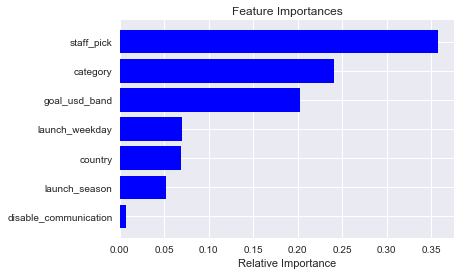

In [59]:
features = data.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

The three most important features are:
- staff_pick: Whether kickstarter staff promotes the project
- category: The category of the project
- goal_usd_band: How much money the project is looking to raise.

ROC curve

In [ ]:
X = data.as_matrix()
y = target.as_matrix()

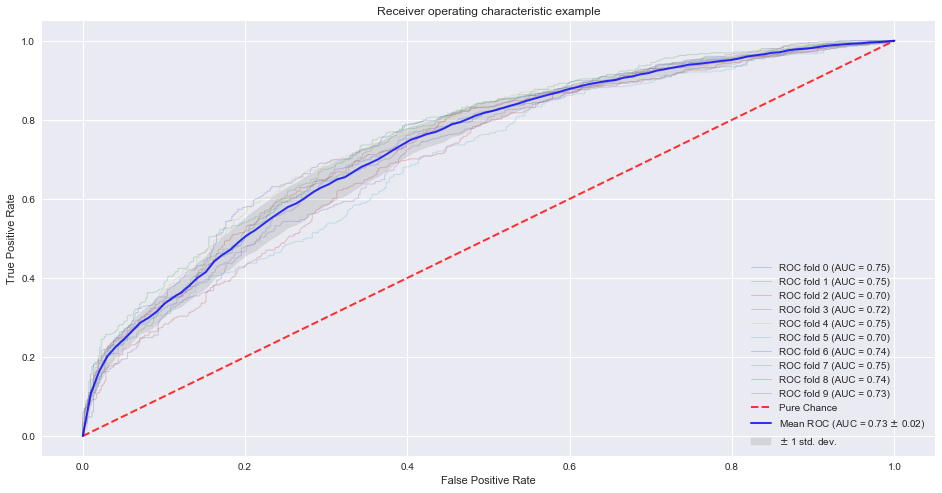

In [63]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

X = data.as_matrix()
y = target.as_matrix()

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
fig, ax = plt.subplots(figsize=(16, 8))
for train, test in cv.split(X, y):
    probas_ = clf.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Pure Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

The AUC (Area under curve) is 0.73. 

# Conclusions

I have used random forest classifier to predict whether a kickstarter project will be successful or not, which can predict with 65\% accuracy.

Based on feature importance, the three most important factors that influence whether a project will be funded is whether staff promotes the project, the category of the project and the funding goal.

Through exploratory data analysis, I have also found that projects launched in the summer seasons are on average less successful. The origin country of the project matters as well, with non-american projects being less likely to be funded. 